In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
dollar_to_pesos = pd.read_csv('DEXMXUS.csv')
dollar_to_pesos.head()

,DATE,DEXMXUS
0,2014-09-08,13.0755
1,2014-09-09,13.2040
2,2014-09-10,13.2090
3,2014-09-11,13.2120
4,2014-09-12,13.2485


In [10]:
favour_polls = pd.read_csv('favorability_polls.csv')

In [11]:
trump_favour = favour_polls[favour_polls['politician'] == 'Donald Trump']
trump_favour['DATE'] = pd.to_datetime(trump_favour['start_date'], format='%m/%d/%y')
trump_favour = trump_favour[['DATE','politician', 'favorable']].reset_index(drop=True)
trump_favour.head()

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_12470/2312294248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_favour['DATE'] = pd.to_datetime(trump_favour['start_date'], format='%m/%d/%y')


,DATE,politician,favorable
0,2024-09-06,Donald Trump,44.5
1,2024-09-06,Donald Trump,45.6
2,2024-09-06,Donald Trump,46.9
3,2024-09-06,Donald Trump,44.0
4,2024-09-03,Donald Trump,46.0


In [12]:
dollar_to_pesos['DATE'] = pd.to_datetime(dollar_to_pesos['DATE'], format='%Y-%m-%d')
dollar_to_pesos

,DATE,DEXMXUS
0,2014-09-08,13.0755
1,2014-09-09,13.2040
2,2014-09-10,13.2090
3,2014-09-11,13.2120
4,2014-09-12,13.2485
...,...,...
2605,2024-09-02,.
2606,2024-09-03,19.83
2607,2024-09-04,19.8161
2608,2024-09-05,19.9926


In [13]:
merged_data = pd.merge(dollar_to_pesos, trump_favour, on='DATE', how='inner')


In [14]:
merged_data

,DATE,DEXMXUS,politician,favorable
0,2020-11-04,20.936,Donald Trump,37.0
1,2020-11-05,20.834,Donald Trump,42.0
2,2020-11-06,20.63,Donald Trump,41.0
3,2020-11-10,20.433,Donald Trump,41.0
4,2020-11-10,20.433,Donald Trump,42.0
...,...,...,...,...
882,2024-09-04,19.8161,Donald Trump,47.0
883,2024-09-06,20.0399,Donald Trump,44.5
884,2024-09-06,20.0399,Donald Trump,45.6
885,2024-09-06,20.0399,Donald Trump,46.9


In [15]:
# look at specific time frame:
trump_favour_2024 = trump_favour[trump_favour['DATE'] > '2024']

In [16]:
merged_data_2024 = pd.merge(dollar_to_pesos, trump_favour_2024, on='DATE', how='inner')


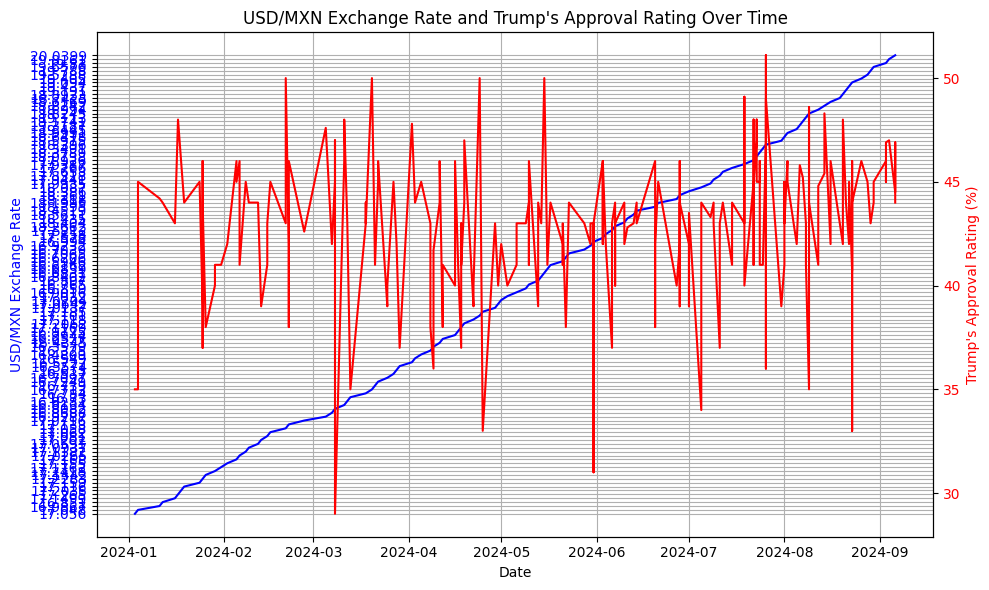

In [17]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot exchange rate on the left y-axis
ax1.set_xlabel('Date')
ax1.set_ylabel('USD/MXN Exchange Rate', color='blue')
ax1.plot(merged_data_2024['DATE'], merged_data_2024['DEXMXUS'], label='USD/MXN Exchange Rate', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)

# Create a second y-axis to plot approval rating
ax2 = ax1.twinx()  # instantiate a second y-axis that shares the same x-axis
ax2.set_ylabel("Trump's Approval Rating (%)", color='red')
ax2.plot(merged_data_2024['DATE'], merged_data_2024['favorable'], label="Trump's Approval Rating", color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add titles and show plot
plt.title('USD/MXN Exchange Rate and Trump\'s Approval Rating Over Time')
fig.tight_layout()  # to prevent overlap of labels
plt.show()

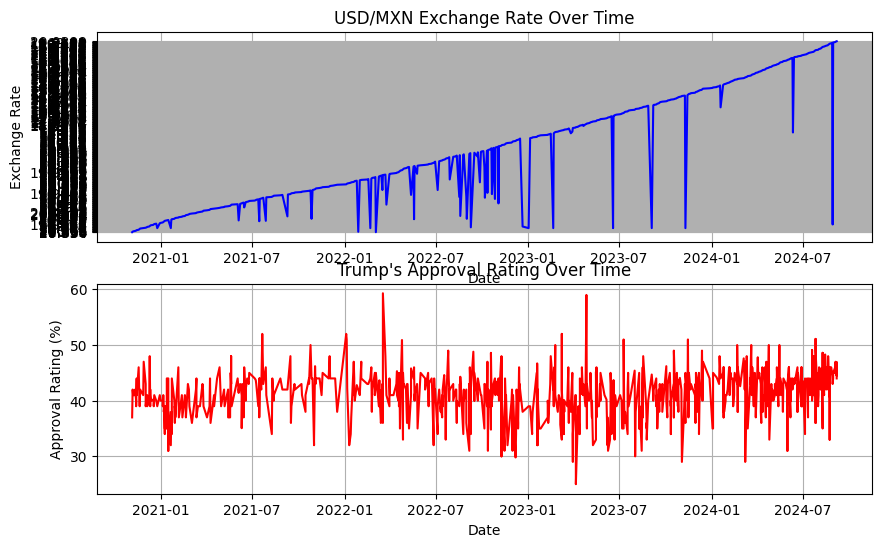

In [18]:
plt.figure(figsize=(10,6))

# Plot exchange rate
plt.subplot(2, 1, 1)
plt.plot(merged_data['DATE'], merged_data['DEXMXUS'], label='USD/MXN Exchange Rate', color='blue')
plt.title('USD/MXN Exchange Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.grid(True)

# Plot approval rating
plt.subplot(2, 1, 2)
plt.plot(merged_data['DATE'], merged_data['favorable'], label="Trump's Approval Rating", color='red')
plt.title("Trump's Approval Rating Over Time")
plt.xlabel('Date')
plt.ylabel('Approval Rating (%)')
plt.grid(True)

plt.show()

/var/folders/mc/2wjfdchj6vsffbrpfbfgqw4w0000gn/T/ipykernel_12470/1394855866.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trump_favour['DATE'] = pd.to_datetime(trump_favour['start_date'], format='%m/%d/%y')


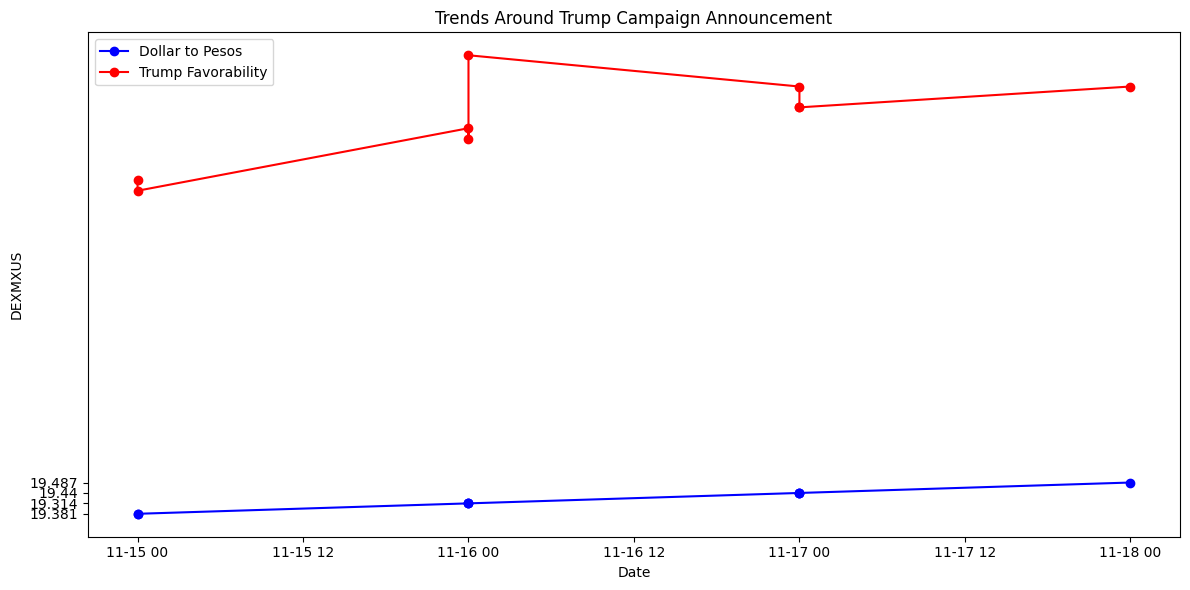

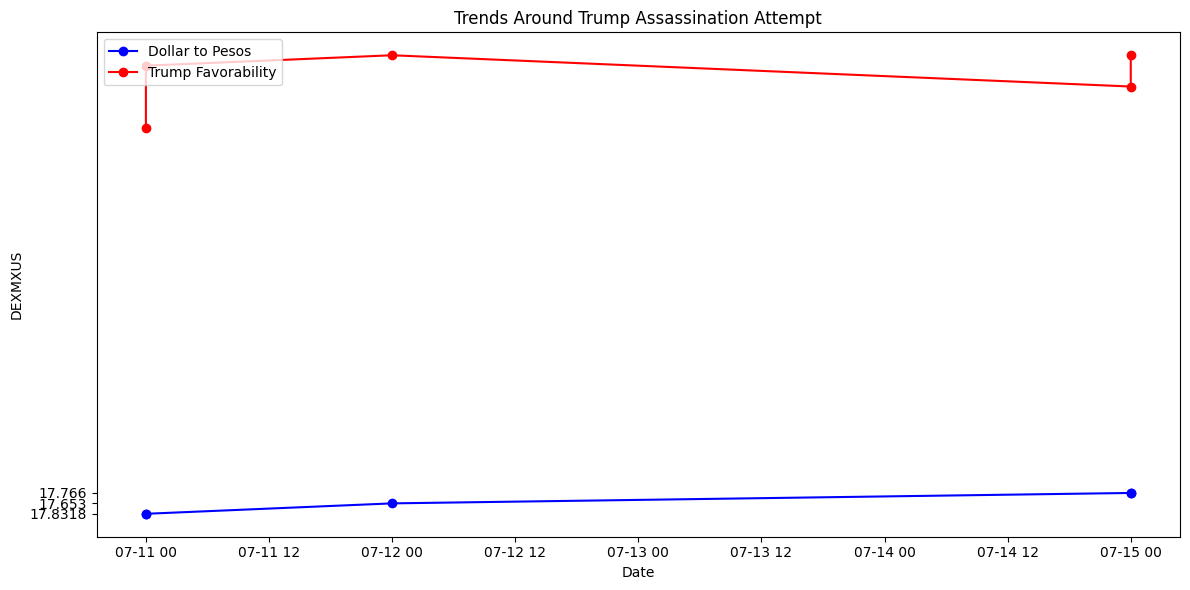

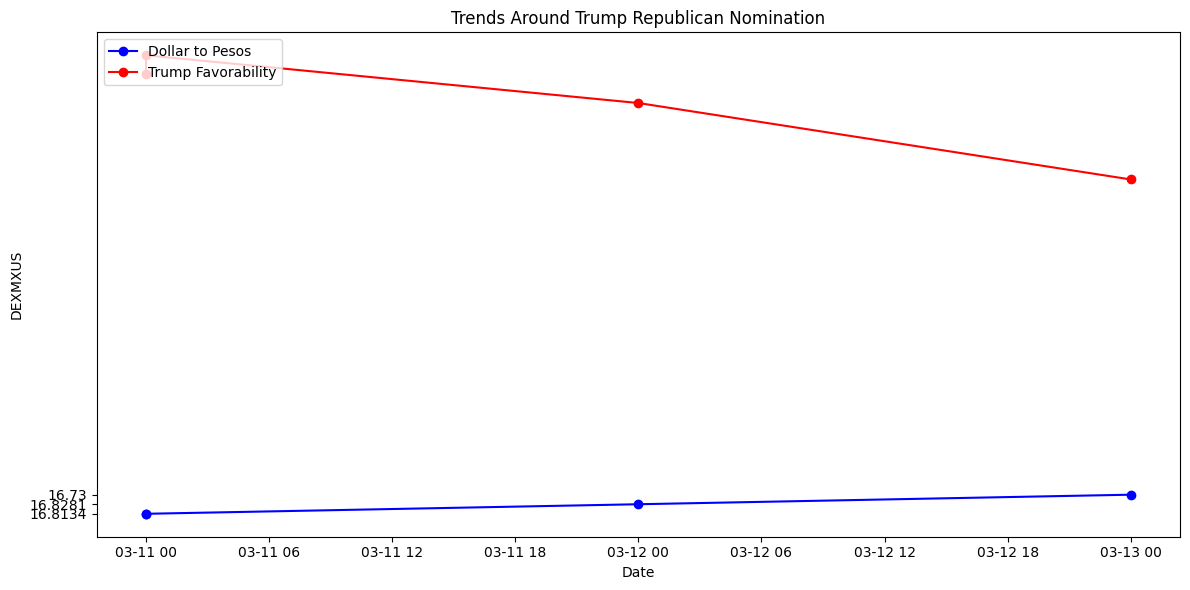

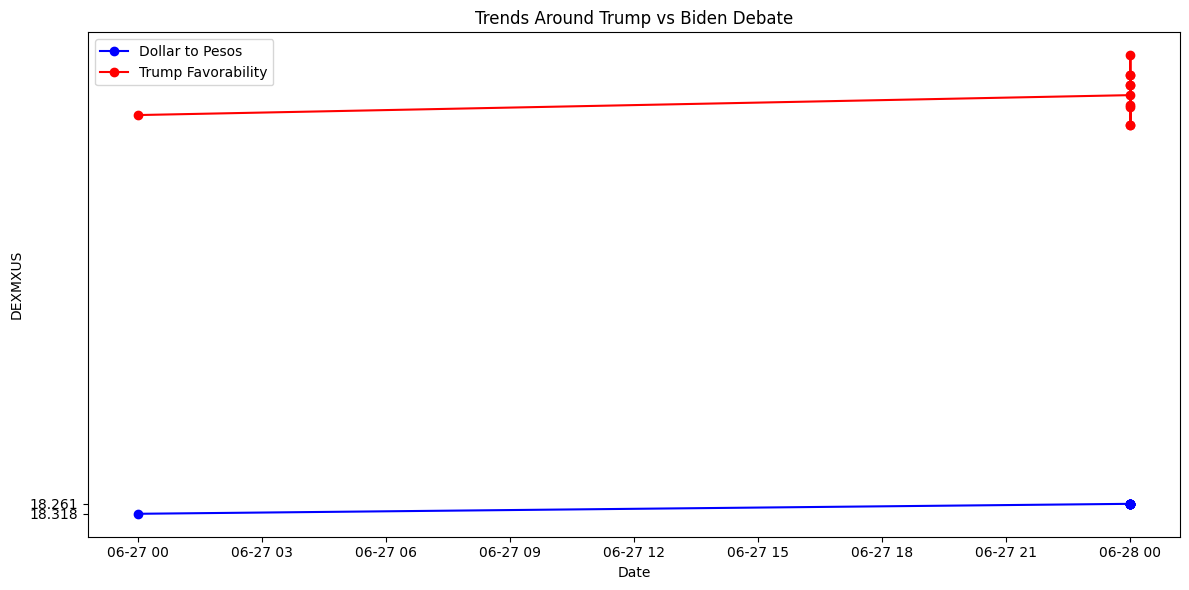

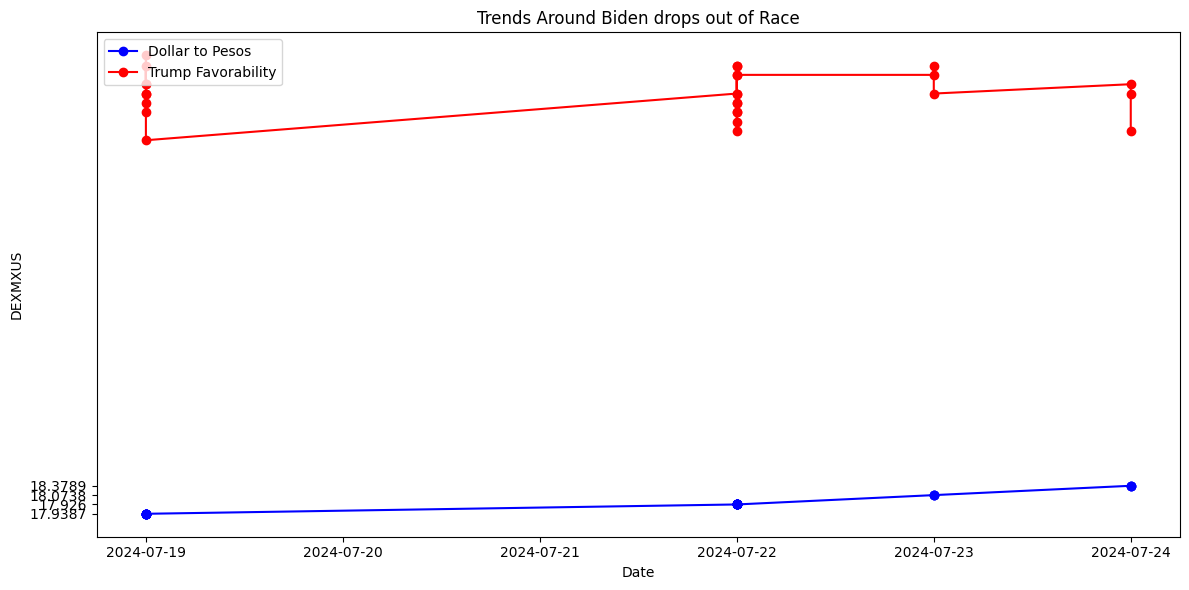

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import timedelta

# Load the datasets
dollar_to_pesos = pd.read_csv('DEXMXUS.csv')
favour_polls = pd.read_csv('favorability_polls.csv')

# Process the favorability polls data
trump_favour = favour_polls[favour_polls['politician'] == 'Donald Trump']
trump_favour['DATE'] = pd.to_datetime(trump_favour['start_date'], format='%m/%d/%y')
trump_favour = trump_favour[['DATE', 'politician', 'favorable']].reset_index(drop=True)

# Process the dollar to pesos data
dollar_to_pesos['DATE'] = pd.to_datetime(dollar_to_pesos['DATE'], format='%Y-%m-%d')

# Merge the datasets on DATE
merged_data = pd.merge(dollar_to_pesos, trump_favour, on='DATE', how='inner')

# Define the key dates and their ranges
events = {
    'Trump Campaign Announcement': pd.Timestamp('2022-11-15'),
    'Trump Assassination Attempt': pd.Timestamp('2024-07-13'),
    'Trump Republican Nomination': pd.Timestamp('2024-03-12'),
    'Trump vs Biden Debate': pd.Timestamp('2024-06-27'),
    'Biden drops out of Race': pd.Timestamp('2024-07-21')
}

# Create line graphs for each key date
for event, date in events.items():
    # Define the date range for ±3 days
    start_date = date - timedelta(days=3)
    end_date = date + timedelta(days=3)
    
    # Filter data for this date range
    filtered_data = merged_data[(merged_data['DATE'] >= start_date) & (merged_data['DATE'] <= end_date)]
    filtered_data = filtered_data.sort_values('DATE')
    
    # Plot the data
    plt.figure(figsize=(12, 6))
    
    # Plot for the value of the peso
    plt.plot(filtered_data['DATE'], filtered_data['DEXMXUS'], marker='o', color='blue', linestyle='-', label='Dollar to Pesos')
    
    # Plot for Trump's favorability
    plt.plot(filtered_data['DATE'], filtered_data['favorable'], marker='o', color='red', linestyle='-', label='Trump Favorability')
    
    # Add labels and title
    plt.xlabel('Date')
    plt.ylabel('DEXMXUS')
    plt.title(f'Trends Around {event}')
    plt.legend(loc='upper left')
    
    # Show plot
    plt.tight_layout()
    plt.show()

In [20]:
'''
1. Early 2022: Trade and Economic Policies
Event Analysis:
Statements: In early 2022, Donald Trump made several comments regarding trade policies and criticized the USMCA (United States-Mexico-Canada Agreement), suggesting that it might need to be renegotiated.
Impact: These statements potentially introduced market uncertainty and risk aversion. Concerns over possible changes to trade agreements or economic disruptions could have led to a weakening of the Mexican peso (MXN) as investors anticipated potential negative impacts on the Mexican economy.
2. August 2022: Trump’s Legal Issues and Political Rally
Event Analysis:
Statements/Rallies: In August 2022, Trump faced legal challenges related to classified documents and held high-profile political rallies to support his campaign.
Impact: The combination of legal troubles and active campaigning could have contributed to political uncertainty. Such instability might have led investors to seek safer assets, possibly causing the peso to weaken against the US dollar (USD).
3. January 2023: Trump’s Return to Public Stage
Event Analysis:
Statements: Trump made significant public appearances and reiterated his positions on border security and trade. His rhetoric included strong statements on policies affecting Mexico.
Impact: His return to the public stage with reiterated stances on sensitive issues might have increased market uncertainty. Any perceived risk of stricter policies or strained relations with Mexico could have led to a depreciation of the peso.
4. June 2023: Supreme Court Rulings and Policy Announcements
Event Analysis:
Statements/Influence: Discussions about Trump’s influence on the Supreme Court and potential judicial decisions were prominent. Trump’s campaign highlighted his judicial appointments and their potential impact.
Impact: Concerns about judicial changes and their implications for economic policies might have created volatility in the market. This uncertainty could have contributed to a weakening of the peso as investors reacted to potential risks.
5. September 2023: Presidential Debate and Campaign Events
Event Analysis:
Debates/Statements: During September 2023, key presidential debates and campaign events featured Trump’s statements on trade and immigration.
Impact: Significant campaign events and debates can lead to immediate market reactions. If Trump’s statements were perceived as likely to disrupt US-Mexico relations or economic stability, the peso might have weakened in response.
6. February 2024: Campaign Rally and Policy Proposals
Event Analysis:
Rally/Proposals: In February 2024, Trump held a major rally and proposed new policies related to the Mexican border and trade, including potential increases in tariffs.
Impact: Aggressive policy proposals or rhetoric could heighten market concerns. Anticipation of economic disruptions or strained trade relations could lead to a weakening of the peso as investors reacted to perceived risks.
7. April 2024: Trump’s Tax Reform Proposal
Event Analysis:
Proposal: Trump proposed a major tax reform plan in April 2024, which included changes to corporate tax rates and economic policies that could impact international trade.
Impact: Major tax reform proposals can influence investor confidence and economic outlooks. If the proposals were perceived as potentially disruptive to the Mexican economy, it could have led to a weakening of the peso.
8. June 2024: Key Endorsements and Campaign Events
Event Analysis:
Endorsements/Events: Trump received key endorsements from influential political figures and held significant campaign events in June 2024, emphasizing his economic and trade policies.
Impact: Endorsements and high-profile campaign events can influence public perception and investor sentiment. If the endorsements were perceived as reinforcing controversial policies, it might lead to increased market volatility and a weaker peso.
9. July 2024: Trump’s Foreign Policy Speech
Event Analysis:
Speech: Trump delivered a major foreign policy speech in July 2024, outlining his stance on international relations, including US-Mexico relations and trade policies.
Impact: Foreign policy speeches can affect investor confidence and market stability. If Trump’s speech suggested a more confrontational or uncertain stance on Mexico, it could have led to a depreciation of the peso.
10. August 2024: National Convention and Acceptance Speech
Event Analysis:
Convention/Speech: At the national convention in August 2024, Trump delivered an acceptance speech focusing on his campaign platform and policy priorities.
Impact: Acceptance speeches and conventions can set the tone for the campaign and influence market expectations. If Trump’s speech emphasized contentious policies or strained US-Mexico relations, it could have negatively impacted the peso.

'''

'\n1. Early 2022: Trade and Economic Policies\nEvent Analysis:\nStatements: In early 2022, Donald Trump made several comments regarding trade policies and criticized the USMCA (United States-Mexico-Canada Agreement), suggesting that it might need to be renegotiated.\nImpact: These statements potentially introduced market uncertainty and risk aversion. Concerns over possible changes to trade agreements or economic disruptions could have led to a weakening of the Mexican peso (MXN) as investors anticipated potential negative impacts on the Mexican economy.\n2. August 2022: Trump’s Legal Issues and Political Rally\nEvent Analysis:\nStatements/Rallies: In August 2022, Trump faced legal challenges related to classified documents and held high-profile political rallies to support his campaign.\nImpact: The combination of legal troubles and active campaigning could have contributed to political uncertainty. Such instability might have led investors to seek safer assets, possibly causing the p

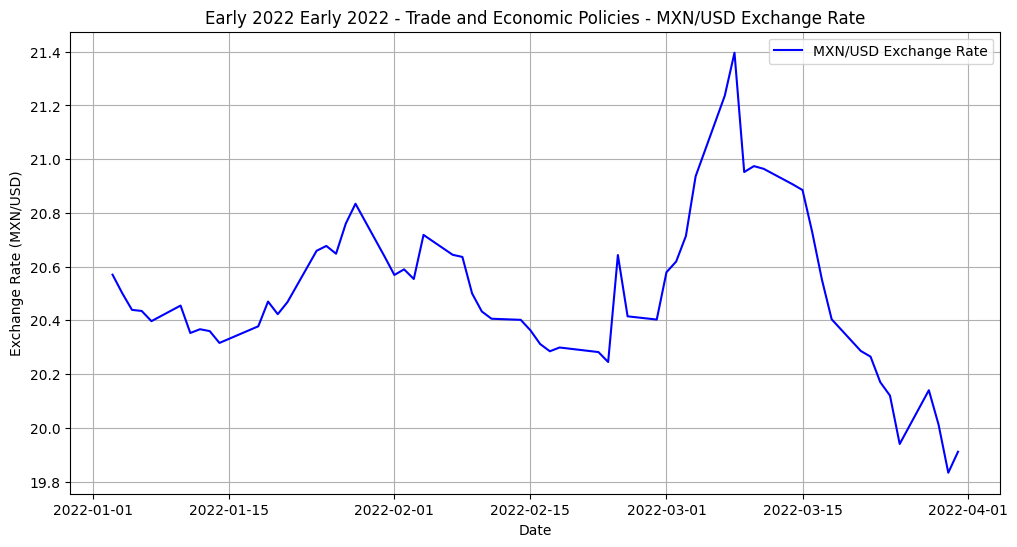

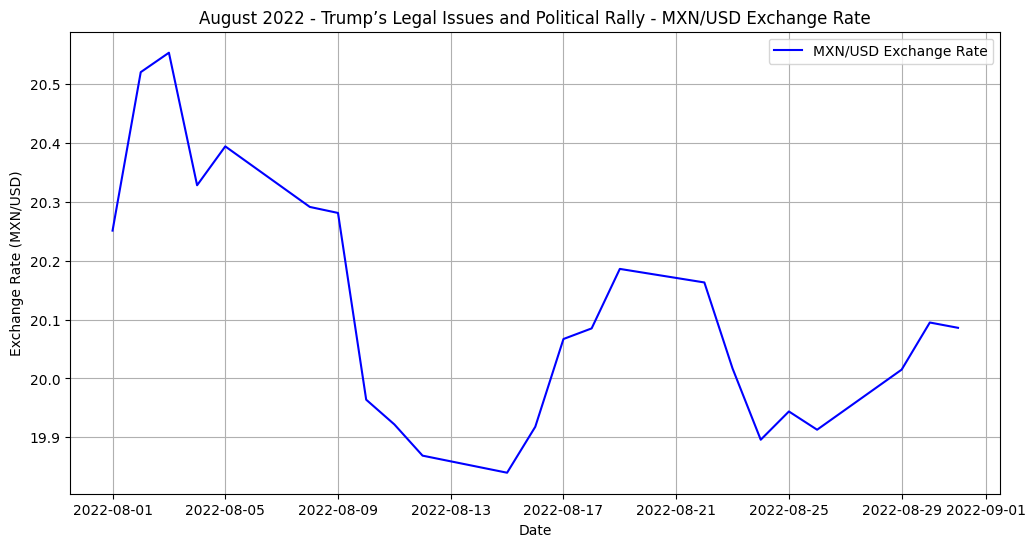

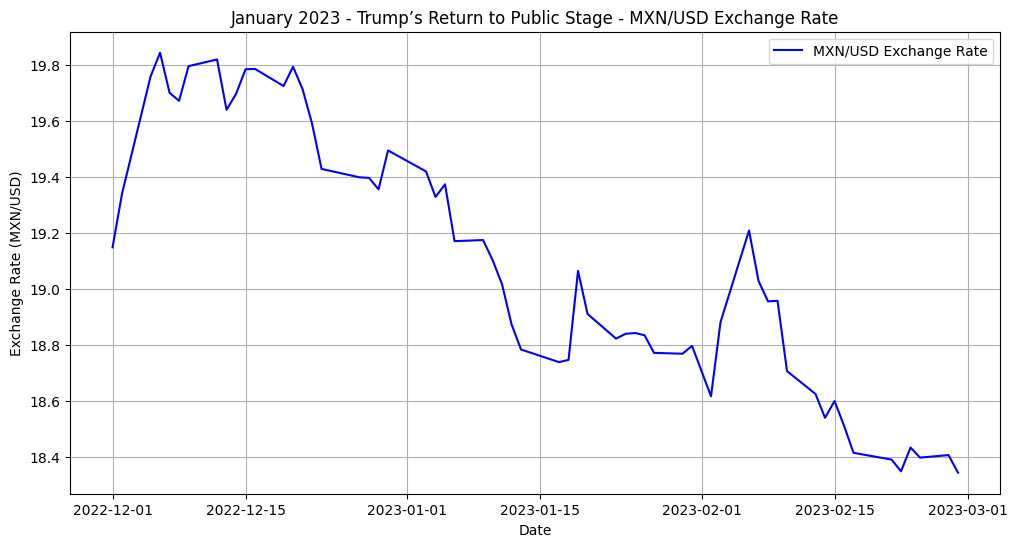

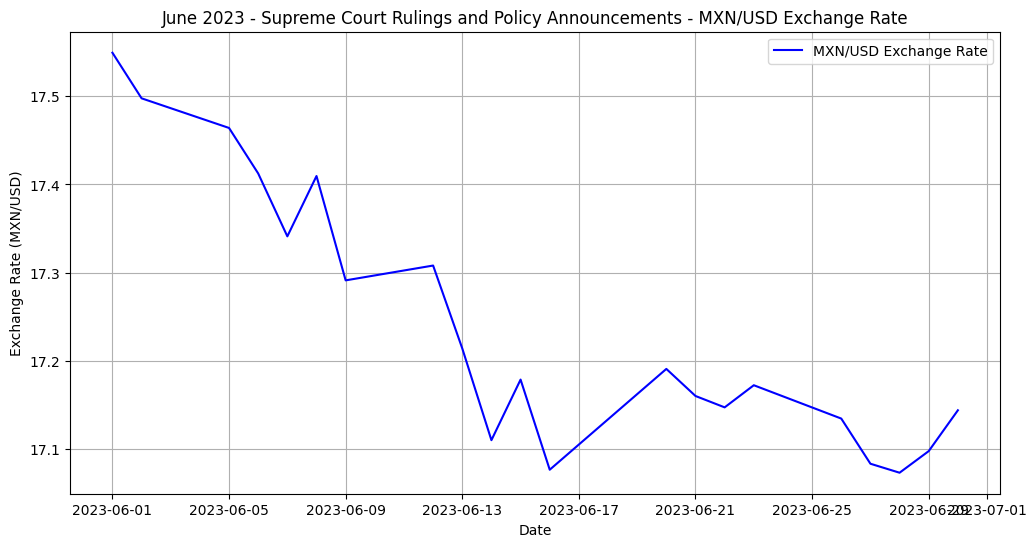

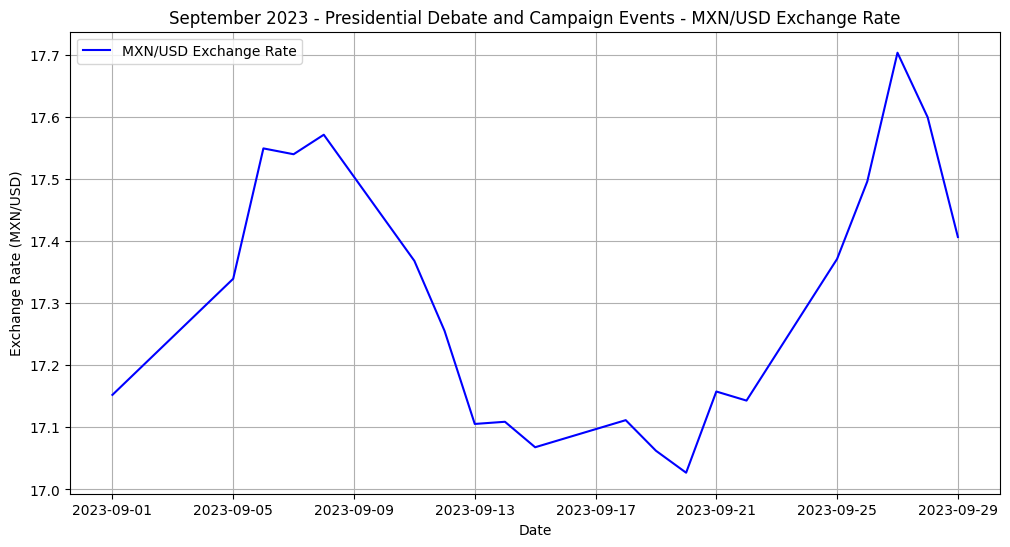

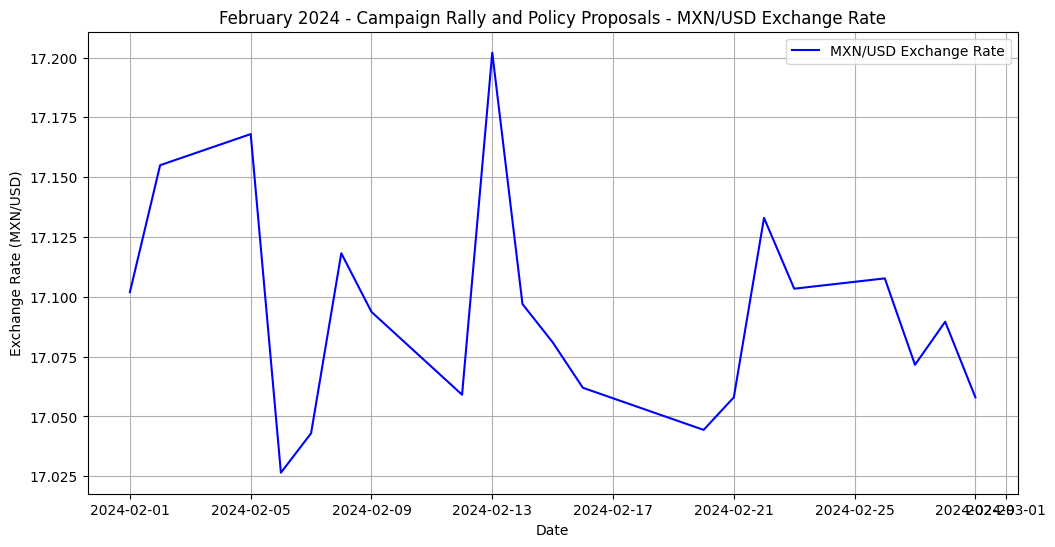

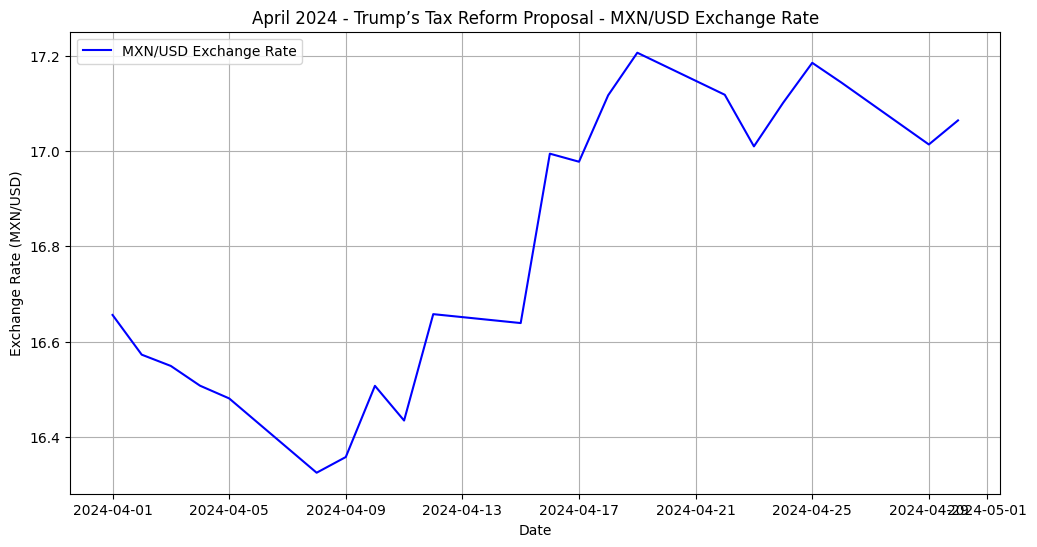

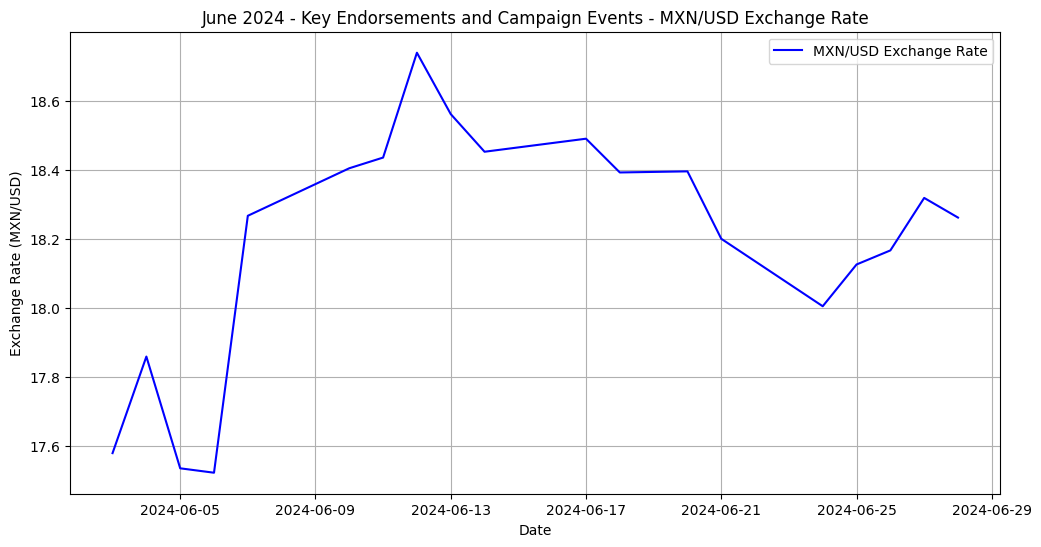

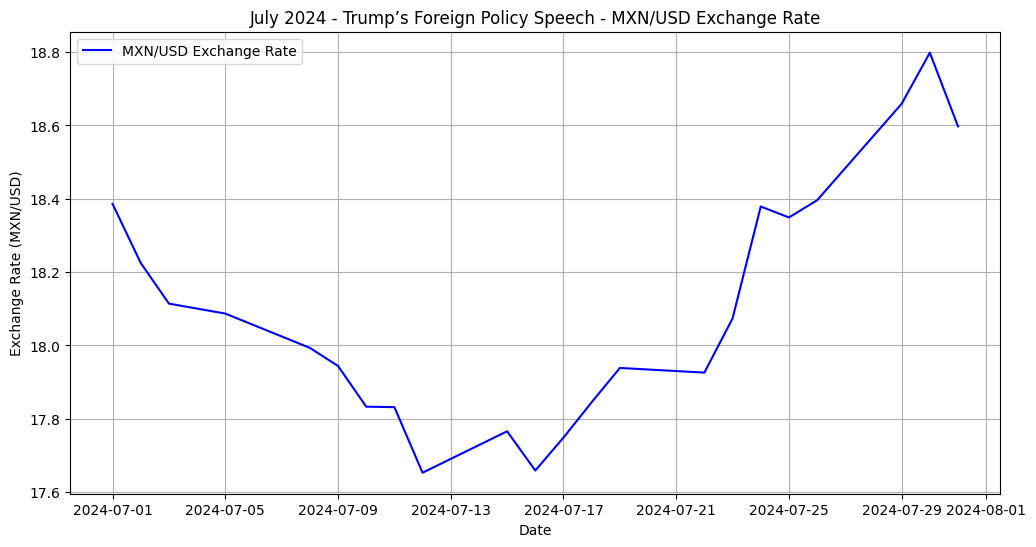

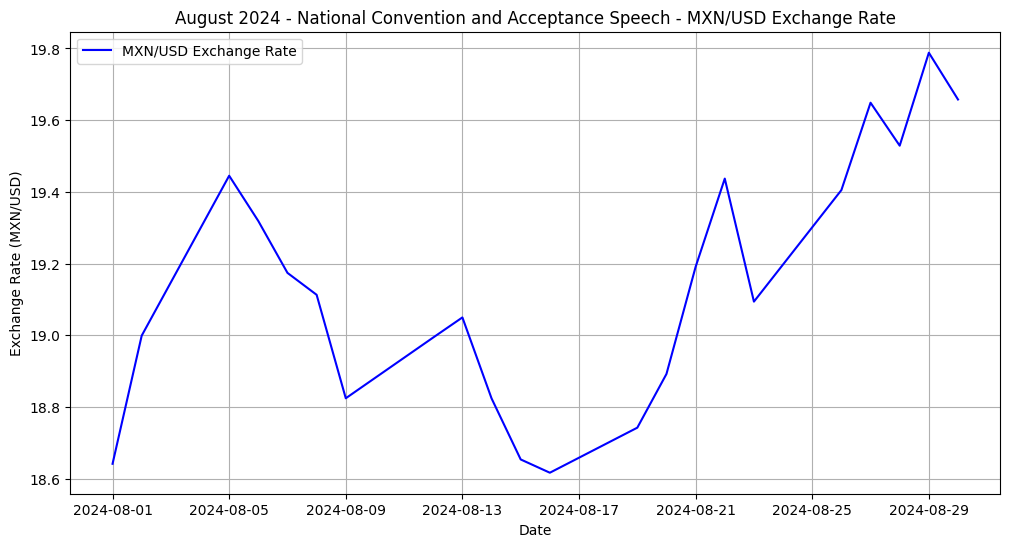

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset for dollar to pesos exchange rate
dollar_to_pesos = pd.read_csv('DEXMXUS.csv')

# Process the dollar to pesos data
dollar_to_pesos['DATE'] = pd.to_datetime(dollar_to_pesos['DATE'], format='%Y-%m-%d')

# Convert the 'DEXMXUS' column to numeric, forcing any errors to be NaN
dollar_to_pesos['DEXMXUS'] = pd.to_numeric(dollar_to_pesos['DEXMXUS'], errors='coerce')

# Drop any rows with missing values in 'DEXMXUS'
dollar_to_pesos = dollar_to_pesos.dropna(subset=['DEXMXUS'])

events = {
    'Early 2022 Early 2022 - Trade and Economic Policies': ('2022-01-01', '2022-03-31'),
    'August 2022 - Trump’s Legal Issues and Political Rally': ('2022-08-01', '2022-08-31'),
    'January 2023 - Trump’s Return to Public Stage': ('2022-12-01', '2023-02-28'),
    'June 2023 - Supreme Court Rulings and Policy Announcements': ('2023-06-01', '2023-06-30'),
    'September 2023 - Presidential Debate and Campaign Events': ('2023-09-01', '2023-09-30'),
    'February 2024 - Campaign Rally and Policy Proposals': ('2024-02-01', '2024-02-29'),
    'April 2024 - Trump’s Tax Reform Proposal': ('2024-04-01', '2024-04-30'),
    'June 2024 - Key Endorsements and Campaign Events': ('2024-06-01', '2024-06-30'),
    'July 2024 - Trump’s Foreign Policy Speech': ('2024-07-01', '2024-07-31'),
    'August 2024 - National Convention and Acceptance Speech': ('2024-08-01', '2024-08-31'),
}


# Function to plot exchange rate data for each event
def plot_event_data(event_name, start_date, end_date):
    # Filter data for the event period
    mask = (dollar_to_pesos['DATE'] >= start_date) & (dollar_to_pesos['DATE'] <= end_date)
    event_data = dollar_to_pesos.loc[mask]
    
    # Plotting
    plt.figure(figsize=(12, 6))
    plt.plot(event_data['DATE'], event_data['DEXMXUS'], label='MXN/USD Exchange Rate', color='blue')
    plt.title(f'{event_name} - MXN/USD Exchange Rate')
    plt.xlabel('Date')
    plt.ylabel('Exchange Rate (MXN/USD)')
    
    plt.legend()
    plt.grid(True)
    plt.show()

# Plot exchange rate data for each event
for event_name, (start_date, end_date) in events.items():
    plot_event_data(event_name, start_date, end_date)

